<a href="https://colab.research.google.com/github/Sairam901423/MACHINE-LEARNING-PROJECT/blob/main/pr_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
Data Covariance Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  
Generated Samples:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.990332          3.985576           3.531061          1.280034
1           5.717559          2.644141           2.727333          0.502403
2   

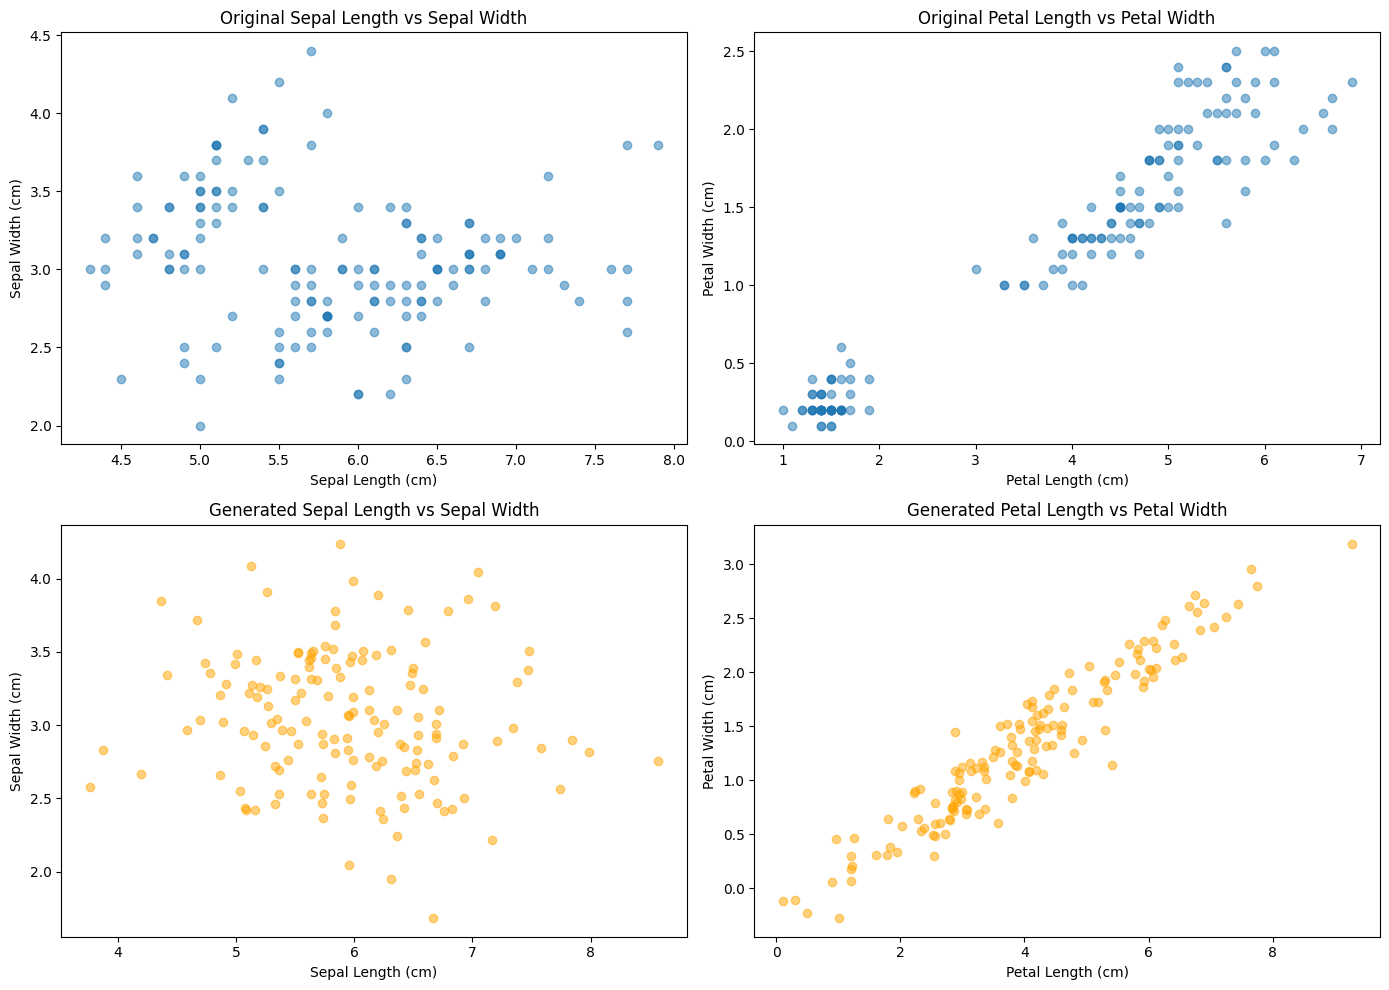

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load the Iris Dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Display basic statistics
print("Data Mean:\n", data.mean())
print("Data Covariance Matrix:\n", data.cov())
# Extract mean and covariance
mean = data.mean().values
covariance_matrix = data.cov().values
# Generate samples from a normal distribution with the given mean and covariance
num_samples = 150 # Number of samples to generate
samples = np.random.multivariate_normal(mean, covariance_matrix,
num_samples)
# Create a DataFrame for the generated samples
generated_data = pd.DataFrame(samples, columns=data.columns)
# Display the first few rows of the generated data
print("Generated Samples:\n", generated_data.head())
# Plotting the original and generated data for comparison
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
# Original Data Plots
axs[0, 0].scatter(data['sepal length (cm)'], data['sepal width (cm)'],
alpha=0.5)
axs[0, 0].set_title('Original Sepal Length vs Sepal Width')
axs[0, 0].set_xlabel('Sepal Length (cm)')
axs[0, 0].set_ylabel('Sepal Width (cm)')
axs[0, 1].scatter(data['petal length (cm)'], data['petal width (cm)'],
alpha=0.5)
axs[0, 1].set_title('Original Petal Length vs Petal Width')
axs[0, 1].set_xlabel('Petal Length (cm)')
axs[0, 1].set_ylabel('Petal Width (cm)')
# Generated Data Plots
axs[1, 0].scatter(generated_data['sepal length (cm)'],
generated_data['sepal width (cm)'], alpha=0.5, color='orange')
axs[1, 0].set_title('Generated Sepal Length vs Sepal Width')
axs[1, 0].set_xlabel('Sepal Length (cm)')
axs[1, 0].set_ylabel('Sepal Width (cm)')
axs[1, 1].scatter(generated_data['petal length (cm)'],
generated_data['petal width (cm)'], alpha=0.5, color='orange')
axs[1, 1].set_title('Generated Petal Length vs Petal Width')
axs[1, 1].set_xlabel('Petal Length (cm)')
axs[1, 1].set_ylabel('Petal Width (cm)')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Load the Iris Dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
# For binary classification: Iris-setosa vs. Iris-versicolor
data = data[data['target'] != 2] # Exclude Iris-virginica
data['target'] = data['target'].map({0: 0, 1: 1}) # Map to binary target
# Split Data into Features and Target
X = data.drop('target', axis=1).values
y = data['target'].values
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)
# Standardize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define the Perceptron Algorithm
class Perceptron:
def init (self, learning_rate=0.01, n_iter=1000):
self.learning_rate = learning_rate
self.n_iter = n_iter
def fit(self, X, y):
self.weights = np.zeros(X.shape[1] + 1) # Including bias term
self.errors = []
for _ in range(self.n_iter):
errors = 0
for xi, target in zip(X, y):
update = self.learning_rate * (target -
self.predict(xi))
self.weights[1:] += update * xi
self.weights[0] += update
errors += int(update != 0.0)
self.errors.append(errors)
def predict(self, X):
return np.where(self._net_input(X) >= 0.0, 1, 0)
def _net_input(self, X):
return np.dot(X, self.weights[1:]) + self.weights[0]
# Train the Perceptron Model
perceptron = Perceptron(learning_rate=0.01, n_iter=1000)
perceptron.fit(X_train, y_train)
# Make Predictions
y_pred = perceptron.predict(X_test)
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
# Plot the Training Errors
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors,
marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Training Errors')
plt.show()

IndentationError: expected an indented block after class definition on line 26 (<ipython-input-3-681ecd8cb90f>, line 27)